In [1]:
import sys
sys.path.append("..")  # Add the parent directory to the Python path
sys.path.append("/Users/mia/landslide_susceptibility_model")  # Replace with the actual path

In [2]:
from tests.test_data_loader import test_data_loader
# Test the data loader
image_dir = "/Users/mia/landslide_susceptibility_model/data/tiles/images"
label_dir = "/Users/mia/landslide_susceptibility_model/data/tiles/labels"

test_data_loader(image_dir, label_dir, batch_size=16, test_split=0.15, val_split=0.15)

Training batches: 47
Validation batches: 9
Test batches: 10
NaN found in image file: /Users/mia/landslide_susceptibility_model/data/tiles/images/image_tile_1011.npy
NaN found in image file: /Users/mia/landslide_susceptibility_model/data/tiles/images/image_tile_56.npy
NaN found in image file: /Users/mia/landslide_susceptibility_model/data/tiles/images/image_tile_16.npy
torch.Size([16, 1, 256, 256])
Sample batch image shape: torch.Size([16, 4, 256, 256])
Sample batch label shape: torch.Size([16, 1, 256, 256])
All tests passed for data loader!


Output shape: torch.Size([16, 1, 256, 256])
Output values: min=0.2653577923774719, max=0.696892261505127


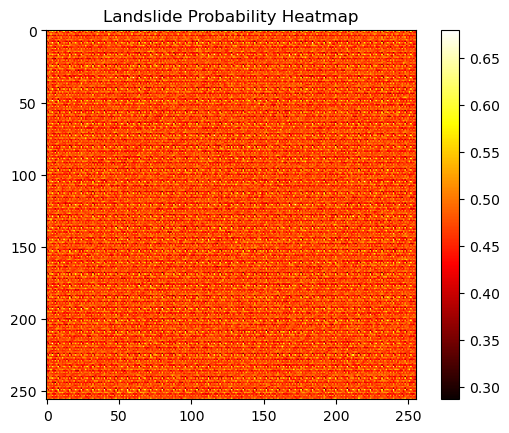

In [5]:
#test outputs of cnn model
import torch
from modeling.cnn import CNNModel

# Create the model
model = CNNModel(input_channels=4)

# Create a dummy input: (batch_size, channels, height, width)
dummy_input = torch.randn(16, 4, 256, 256)

# Forward pass
dummy_output = model(dummy_input)

# Check output shape
print(f"Output shape: {dummy_output.shape}")

# Check range of output values
print(f"Output values: min={dummy_output.min().item()}, max={dummy_output.max().item()}")

import matplotlib.pyplot as plt

# Visualize a single prediction
pred = dummy_output[0, 0].detach().cpu().numpy()  # Remove batch and channel dimensions
plt.imshow(pred, cmap='hot')
plt.colorbar()
plt.title("Landslide Probability Heatmap")
plt.show()

In [2]:
from dataloader.data_loader import get_dataloaders

# Paths to the data directories
image_dir = "/Users/mia/landslide_susceptibility_model/data/tiles/images"
label_dir = "/Users/mia/landslide_susceptibility_model/data/tiles/labels"

# Get data loaders for the full dataset
train_loader, val_loader, test_loader = get_dataloaders(
    image_dir=image_dir, 
    label_dir=label_dir, 
    batch_size=16  # Adjust batch size based on your memory capacity
)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from modeling.cnn import CNNModel
from trainer.train import train_model

# Initialize the CNN model
model = CNNModel(input_channels=4)  # Adjust input_channels if needed

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check device availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


In [4]:
# Train the model
run1 = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=5,  # Adjust based on how long you want to train
    validate_every=5,  # Validate every 2 epochs
    device=device,
    checkpoint_dir="model_runs/checkpoints/cnn_run"  # Save checkpoints for the full run
)

Epoch [1/5], Training Loss: 0.2840
Epoch [2/5], Training Loss: 0.0100
Epoch [3/5], Training Loss: 0.0096
Epoch [4/5], Training Loss: 0.0099
Epoch [5/5], Training Loss: 0.0096
Epoch [5/5], Validation Loss: 0.0122


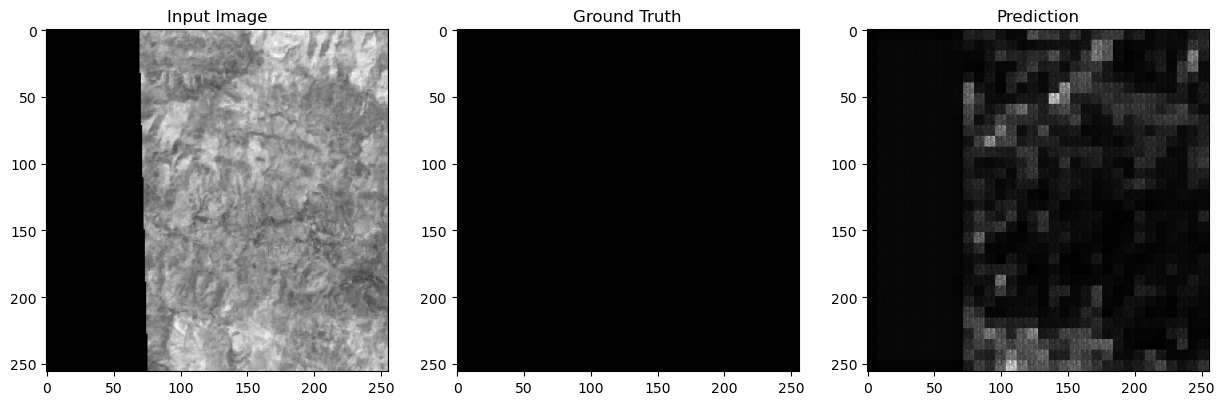

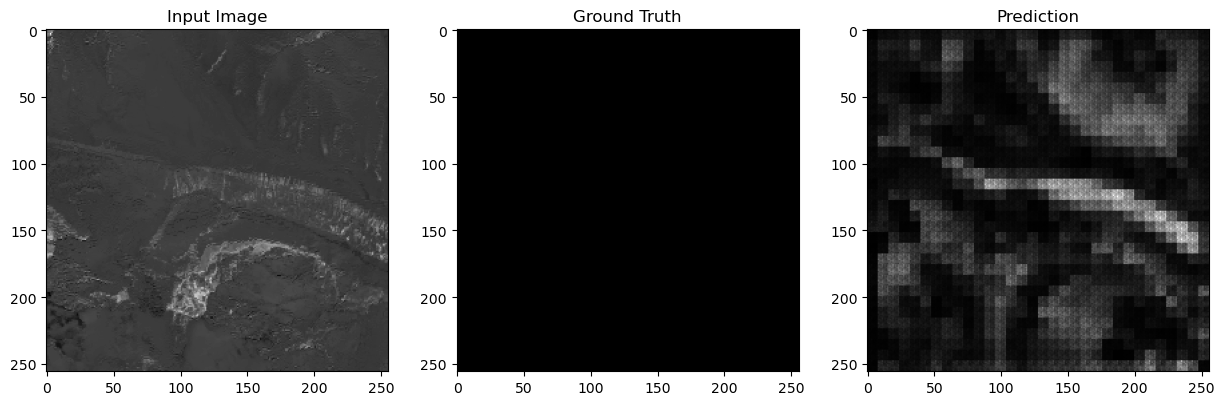

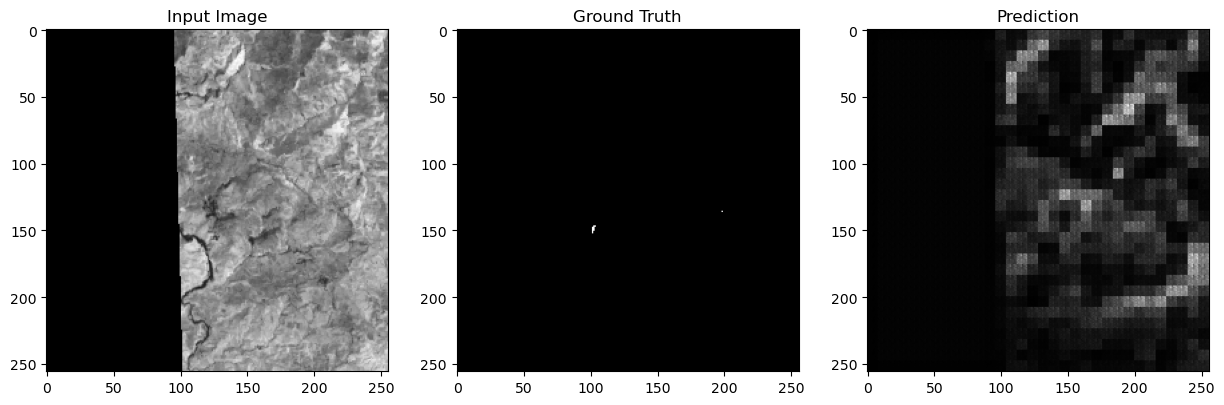

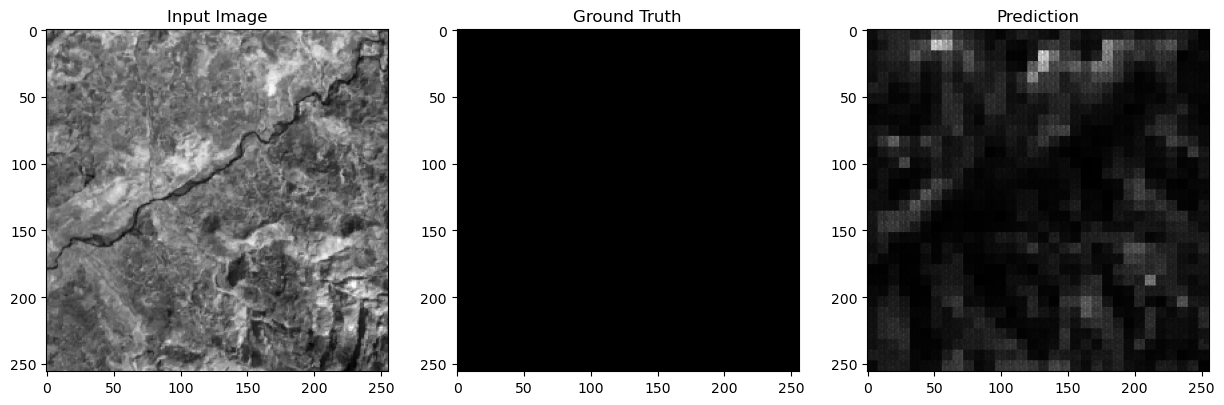

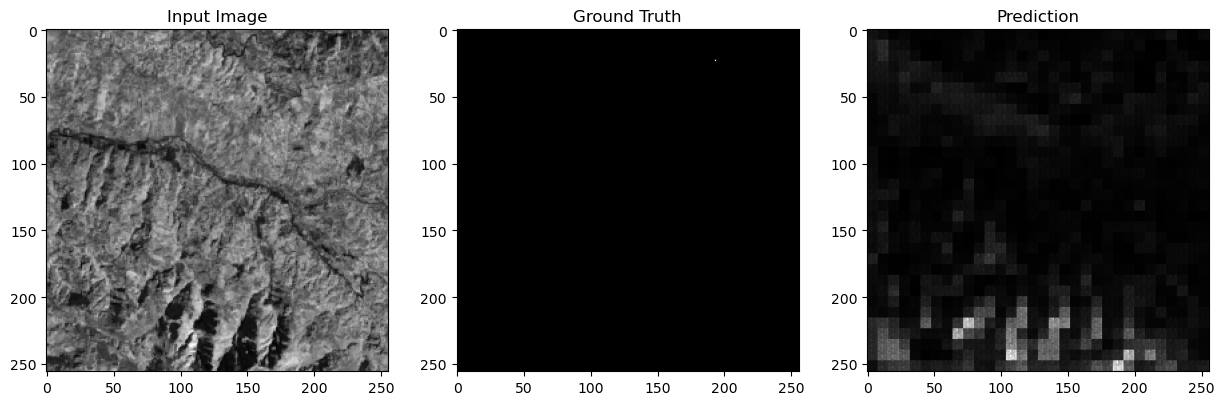

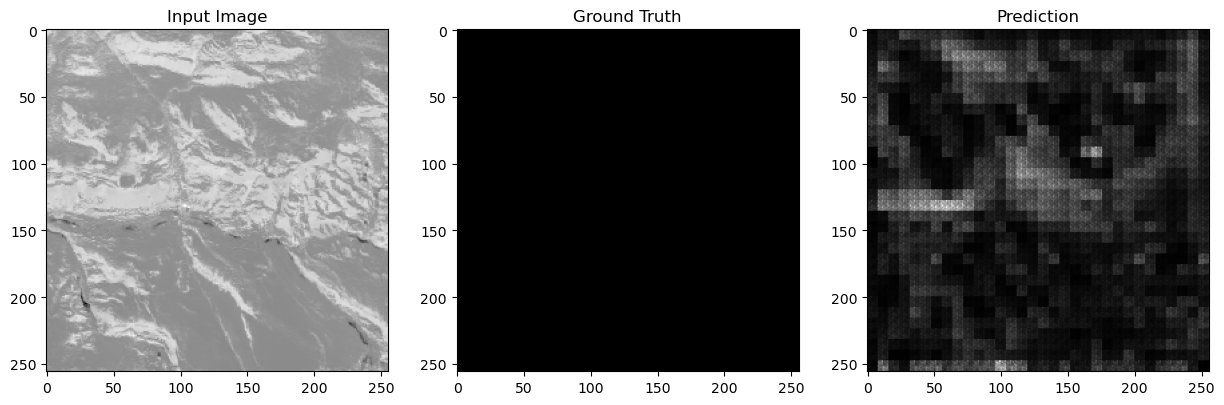

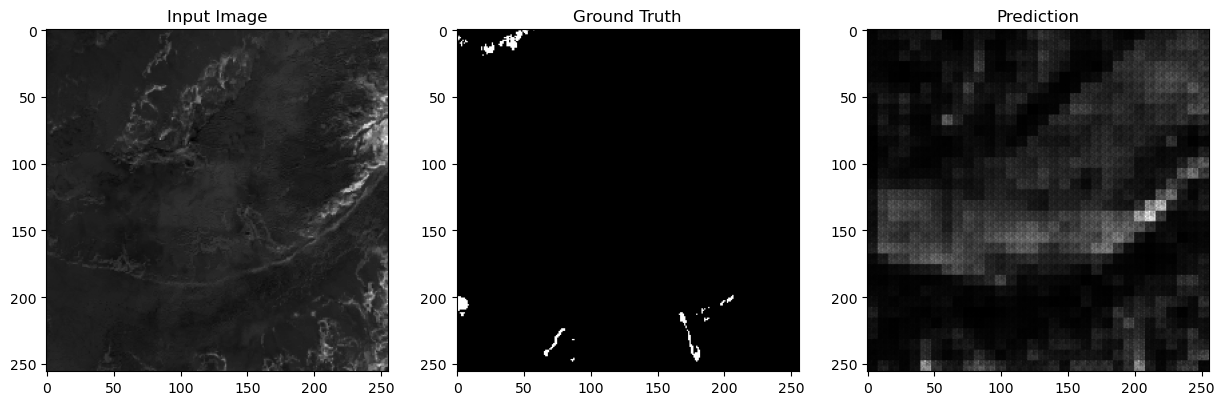

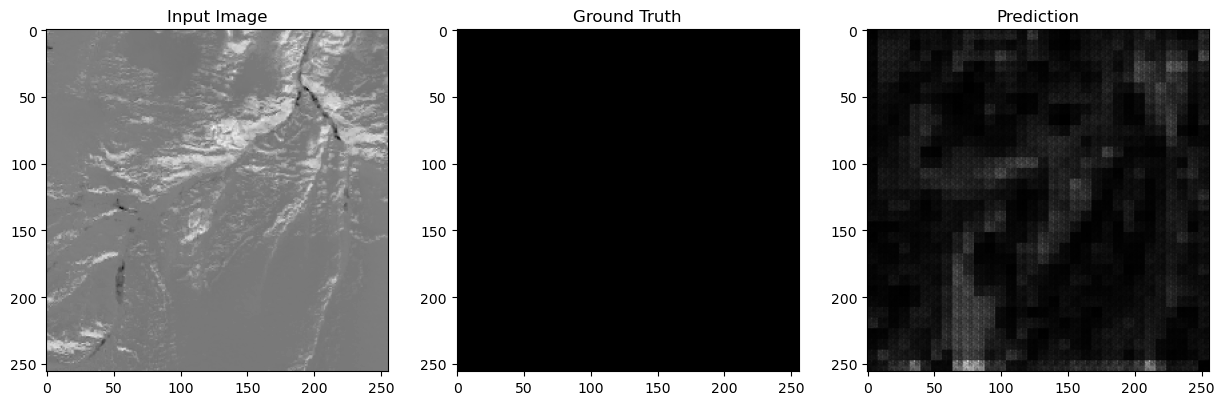

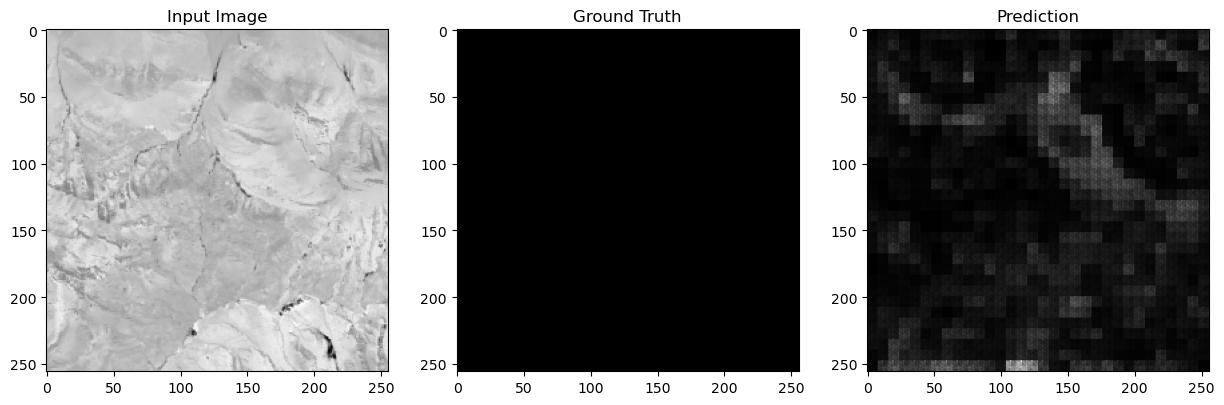

In [6]:
import matplotlib.pyplot as plt

# Example: Visualize a single image, ground truth, and prediction
for images, labels in val_loader:
    with torch.no_grad():
        predictions = model(images.to(device)).cpu().numpy()

    # Visualize first sample
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(images[0, 0], cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(labels[0, 0], cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("Prediction")
    plt.imshow(predictions[0, 0], cmap="gray")
    plt.show()
